# Main Implementation :CNN1D
  * __Simple Dense and RNN are also implemented to show the difference in the result.__ 
#Motivation
  * __The motive of the project is to show the approach of deep learning and the possibility of working with less datasets and the accuracy that we gained with less datasets.__

  * __Futher Pretained Network model (eg: BERT) can be used to gain more accuracy.__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import matplotlib.pyplot as plt


In [ ]:
wipo = pd.read_csv('/content/drive/My Drive/wipo_alpha.csv')

In [ ]:
wipo = wipo.dropna()

In [ ]:
wipo.shape

(10396, 2)

In [ ]:
wipo.head()

,text,label
0,apparatus for carrying out a physical and or c...,f
1,dispersing agents and dispersions made therefr...,c
2,fault location in a medium voltage network a m...,g
3,canvasses reinforced with metal members the in...,d
4,building element a building element comprises ...,e


In [ ]:
wipo_text = wipo['text']
wipo_text.shape

(10396,)

In [ ]:
wipo_label = wipo.label.astype("category").cat.codes
wipo_label.shape

(10396,)

__Tokenizing the text of the raw wipo datasets__



In [ ]:
#cut the text after 1500 words
maxlen = 100

#training samples
train_samples = 5000

#consider only the top 10000 words in the dataset
max_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words = max_words)

In [ ]:
tokenizer.fit_on_texts(wipo_text)

In [ ]:
sequences = tokenizer.texts_to_sequences(wipo_text)

In [ ]:
word_index = tokenizer.word_index
print("found %s unique tokens" % len(word_index))

found 280371 unique tokens


In [ ]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = to_categorical(wipo_label)

print('Shape of data tensor:', data.shape)
print('shape of label tensor:', labels.shape)

Shape of data tensor: (10396, 100)
shape of label tensor: (10396, 8)


__Split train, validation and test data sets__

In [ ]:
x_train = data[:5000]
y_train = labels[:5000]

x_val = data[5000:7500]
y_val = labels[5000:7500]

x_test = data[7500:]
y_test = labels[7500:]

__Preprocessing the Embeddings__

In [ ]:
glove_dir = '/content/drive/My Drive'

embeddings_index = {}
f  = open(os.path.join(glove_dir,'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


__Preparing the GloVe word-embeddings matrix__

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] =  embedding_vector

In [ ]:
embedding_matrix.shape

(10000, 100)

# 1D Convolution Neural Network for Classification

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 94, 32)            22432     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

__Loading Glove the Embedding in the model__

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

__Training and Evaluating the model__

In [ ]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Train on 5000 samples, validate on 2500 samples
Epoch 1/10
5000/5000 [==============================] - 1s 266us/step - loss: 0.4007 - acc: 0.8705 - val_loss: 0.3763 - val_acc: 0.8750
Epoch 2/10
5000/5000 [==============================] - 1s 168us/step - loss: 0.3750 - acc: 0.8750 - val_loss: 0.3734 - val_acc: 0.8750
Epoch 3/10
5000/5000 [==============================] - 1s 163us/step - loss: 0.3716 - acc: 0.8751 - val_loss: 0.3708 - val_acc: 0.8750
Epoch 4/10
5000/5000 [==============================] - 1s 172us/step - loss: 0.3678 - acc: 0.8754 - val_loss: 0.3684 - val_acc: 0.8750
Epoch 5/10
5000/5000 [==============================] - 1s 166us/step - loss: 0.3656 - acc: 0.8756 - val_loss: 0.3652 - val_acc: 0.8753
Epoch 6/10
5000/5000 [==============================] - 1s 162us/step - loss: 0.3623 - acc: 0.8758 - val_loss: 0.3639 - val_acc: 0.8753
Epoch 7/10
5000/5000 [==============================] - 1s 161us/step - loss: 0.3605 - acc: 0.8754 - val_loss: 0.3612 - val_acc: 0.8755


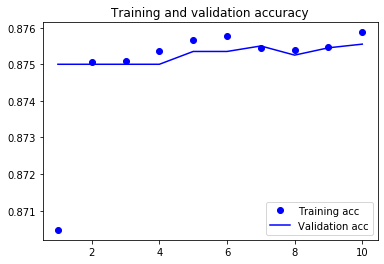

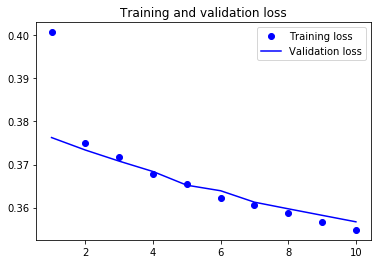

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
history = model.evaluate(x_test, y_test)

2896/2896 [==============================] - 0s 57us/step


In [ ]:
history

[0.3584704986922649, 0.8753884668508287]

# __Simple Dense model definition__

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras import layers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
Total params: 1,320,296
Trainable params: 1,320,296
Non-trainable params: 0
_________________________________________________________________


__Loading the GLoVe Embeddings in the model__


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

__Training and Evaluating the Model__

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Train on 5000 samples, validate on 2500 samples
Epoch 1/10
5000/5000 [==============================] - 1s 216us/step - loss: 0.3823 - acc: 0.8740 - val_loss: 0.3725 - val_acc: 0.8751
Epoch 2/10
5000/5000 [==============================] - 1s 127us/step - loss: 0.3711 - acc: 0.8760 - val_loss: 0.3690 - val_acc: 0.8766
Epoch 3/10
5000/5000 [==============================] - 1s 133us/step - loss: 0.3658 - acc: 0.8768 - val_loss: 0.3679 - val_acc: 0.8757
Epoch 4/10
5000/5000 [==============================] - 1s 127us/step - loss: 0.3631 - acc: 0.8772 - val_loss: 0.3660 - val_acc: 0.8753
Epoch 5/10
5000/5000 [==============================] - 1s 131us/step - loss: 0.3572 - acc: 0.8782 - val_loss: 0.3624 - val_acc: 0.8762
Epoch 6/10
5000/5000 [==============================] - 1s 136us/step - loss: 0.3548 - acc: 0.8790 - val_loss: 0.3752 - val_acc: 0.8750
Epoch 7/10
5000/5000 [==============================] - 1s 141us/step - loss: 0.3505 - acc: 0.8792 - val_loss: 0.3632 - val_acc: 0.8765


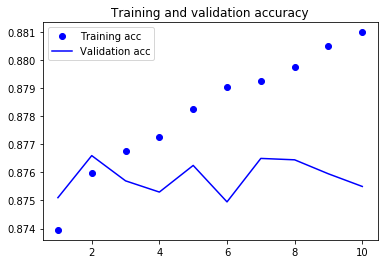

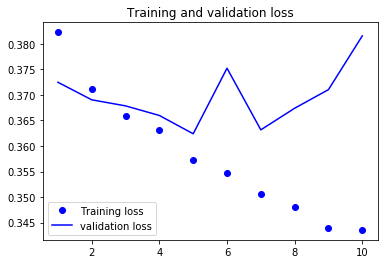

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history = model.evaluate(x_test, y_test)

2896/2896 [==============================] - 0s 61us/step


In [ ]:
history

[0.38087872740972106, 0.8738345994475138]

# Simple RNN Model Definition

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(Embedding(max_words,32))
model.add(SimpleRNN(32))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val,y_val))

Train on 5000 samples, validate on 2500 samples
Epoch 1/10
5000/5000 [==============================] - 4s 705us/step - loss: 2.0781 - acc: 0.1430 - val_loss: 2.0555 - val_acc: 0.1900
Epoch 2/10
5000/5000 [==============================] - 3s 583us/step - loss: 1.9248 - acc: 0.3008 - val_loss: 1.9871 - val_acc: 0.2188
Epoch 3/10
5000/5000 [==============================] - 3s 583us/step - loss: 1.6929 - acc: 0.4492 - val_loss: 2.0346 - val_acc: 0.1932
Epoch 4/10
5000/5000 [==============================] - 3s 586us/step - loss: 1.4145 - acc: 0.6066 - val_loss: 1.9936 - val_acc: 0.2036
Epoch 5/10
5000/5000 [==============================] - 3s 590us/step - loss: 1.1285 - acc: 0.7328 - val_loss: 2.1515 - val_acc: 0.1844
Epoch 6/10
5000/5000 [==============================] - 3s 587us/step - loss: 0.8549 - acc: 0.8250 - val_loss: 2.0922 - val_acc: 0.2168
Epoch 7/10
5000/5000 [==============================] - 3s 582us/step - loss: 0.6365 - acc: 0.8850 - val_loss: 2.1764 - val_acc: 0.2264


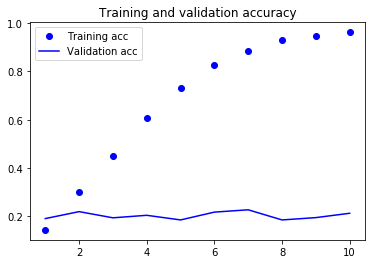

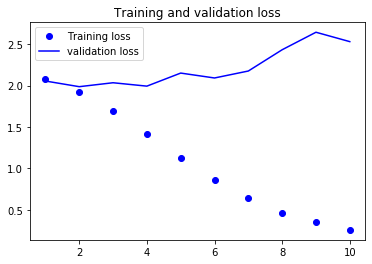

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history = model.evaluate(x_test, y_test)

2896/2896 [==============================] - 1s 222us/step


In [ ]:
history

[2.590470420721486, 0.19751381215469613]